### example of QCL structure  
- Using meep to construct the QCL structure  
- By piling different materials on the geometry list  
- This is an enlarged image of the structure  

In [ ]:
import meep as mp
import numpy as np
from meep.materials import Ti,Au,GaAs

resolution = 50
sx = 12
sy = 5
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(0.1)]

# 各层厚度（单位：μm）
padge_thickness = 0.08
ngaas_thickness = 0.1
ti_thickness = 0.02
au_thickness = 0.18
core_thickness = 2.5
substrate_thickness = 1.0

# 材料定义（近似 ε = n^2）
si_gaas = mp.Medium(epsilon=12.9)
qcl_core = mp.Medium(epsilon=13.0)
pdge = mp.Medium(epsilon=10.0)


geometry = []

# Substrate
geometry.append(mp.Block(
    material=si_gaas,
    size=mp.Vector3(mp.inf, substrate_thickness),
    center=mp.Vector3(y=-sy/2 + substrate_thickness/2)
))

# QCL active region
geometry.append(mp.Block(
    material=qcl_core,
    size=mp.Vector3(mp.inf, core_thickness),
    center=mp.Vector3(y=-sy/2 + substrate_thickness + core_thickness/2)
))

# 上层金属叠层
y0 = -sy/2 + substrate_thickness + core_thickness
geometry += [
    mp.Block(material = pdge, size = mp.Vector3(mp.inf, padge_thickness), center = mp.Vector3(y=y0 + padge_thickness/2)),
    mp.Block(material = GaAs, size = mp.Vector3(mp.inf, ngaas_thickness), center = mp.Vector3(y=y0 + padge_thickness + ngaas_thickness/2)),
    mp.Block(material = Ti, size = mp.Vector3(mp.inf, ti_thickness), center = mp.Vector3(y=y0 + padge_thickness + ngaas_thickness + ti_thickness/2)),
    mp.Block(material = Au, size = mp.Vector3(mp.inf, au_thickness), center = mp.Vector3(y=y0 + padge_thickness + ngaas_thickness + ti_thickness + au_thickness/2))
]


# Source
sources = [mp.Source(
    src=mp.GaussianSource(frequency=1/0.1, fwidth=0.2),
    component=mp.Ez,
    center=mp.Vector3(-3, -sy/2 + 0.5),
    size=mp.Vector3(0, 1.0)
)]

tran_fr = mp.FluxRegion(center=mp.Vector3(6))
frequencies = np.linspace(10,10,100)

# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)

sim.plot2D()


### QCL material structure
- Refer to the "Electronically tunable aperiodic distributed feedback terahertz lasers"  
- The parameter of thickness the epsilon should be changed  
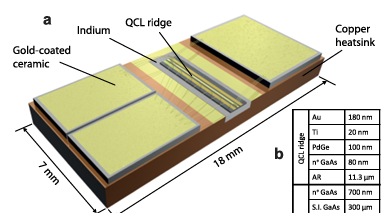

In [ ]:
import meep as mp
import numpy as np

# 各层厚度（单位：μm）
resolution = 50
sx = 700
sy = 35
sz = 120
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(1)]

# 各层厚度（单位：μm）
au_thickness = 0.18
ti_thickness = 0.02
pdge_thickness = 0.1
ngaas_thickness_1 = 0.08
Ar_thickness = 0.0113
ngaas_thickness_2 = 0.7
sigaas_thickness = 30

# 材料定义（近似 ε = n^2）
au = mp.Medium(epsilon=9.5)
ti = mp.Medium(epsilon=6.0)
pdge = mp.Medium(epsilon=10.0)
ngaas = mp.Medium(epsilon=12.5)
Ar = mp.Medium(epsilon=13.0)
si_gaas = mp.Medium(epsilon=12.9,)

geometry = []

# Substrate
geometry.append(mp.Block(
                    material=si_gaas,
                    size=mp.Vector3(sx, sigaas_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2)))

geometry.append(mp.Block(
                    material=ngaas,
                    size=mp.Vector3(sx, ngaas_thickness_2,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2 + ngaas_thickness_2/2)))

# QCL active region
geometry.append(mp.Block(
                    material=Ar,
                    size=mp.Vector3(sx, Ar_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2 + ngaas_thickness_2/2 + Ar_thickness/2)))

# 上层金属叠层
y0 = -sy/2 + sigaas_thickness/2 + ngaas_thickness_2/2 + Ar_thickness/2
geometry += [
    mp.Block(material = Ar,  
             size = mp.Vector3(sx, Ar_thickness,sz), 
             center = mp.Vector3(y=y0 + Ar_thickness/2)),
    mp.Block(material = ngaas, 
             size = mp.Vector3(sx, ngaas_thickness_1,sz), 
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2)),
    mp.Block(material = pdge,    
             size = mp.Vector3(sx, pdge_thickness,sz),    
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2 + pdge_thickness/2)),
    mp.Block(material = ti,    
             size = mp.Vector3(sx, ti_thickness,sz),    
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2 + pdge_thickness/2 + ti_thickness/2)),
    mp.Block(material = au,    
             size = mp.Vector3(sx, au_thickness,sz),    
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2 + pdge_thickness/2 + ti_thickness/2 + au_thickness/2))
]
    
# Source
sources = [mp.Source(
    src=mp.GaussianSource(frequency=1/0.1, fwidth=0.2),
    component=mp.Ez,
    center=mp.Vector3(0,0,0),
    size=mp.Vector3(0,4.0,0))]

# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)


sim.plot2D()

### Grating structure
- Refer to the "Electronically tunable aperiodic distributed feedback terahertz lasers"  
- The axis is redefined z->x y->y x->z  
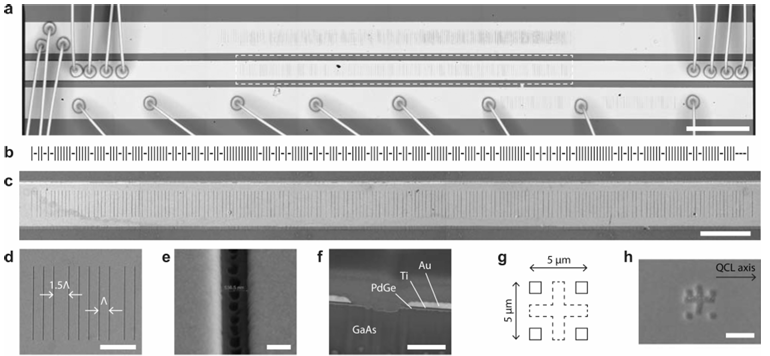

In [ ]:
import meep as mp

resolution = 50
sx = 12
sy = 10
sz = 30
cell = mp.Vector3(sx,sy,0)
pml_layers = [mp.PML(0.1)]

# 各层厚度（单位：μm）
sigaas_thickness = 5

# 材料定义（近似 ε = n^2）
si_gaas = mp.Medium(epsilon=12.9)

geometry = []

# Substrate
geometry.append(mp.Block(
                    material=si_gaas,
                    size=mp.Vector3(sx, sigaas_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2)))

# 光栅参数
Λ = 0.5                    # 基本周期（μm）
slot_width = 0.1           # 槽宽（沿 X）
slot_depth = 5           # 镂刻深度（沿 Y）
slot_spacing = Λ / 2       # 间距
pattern = "|-||-|-||||||-|||||-||||-|||-||-||||"  # 狭缝排列样式

# 起始 X 位置，居中布置
x_start = -len(pattern) * slot_spacing / 2

# 放置高度（y 方向中心）
y_grating = sy - slot_depth / 2 

# 光栅 geometry 列表
grating_geometry = []

# 构造光栅槽
for i, symbol in enumerate(pattern):
    if symbol == "|":
        x_pos = x_start + i * slot_spacing
        grating_geometry.append(mp.Block(
            material=mp.air,
            size=mp.Vector3(slot_width, slot_depth, sz),
            center=mp.Vector3(x_pos)
        ))

geometry += grating_geometry

sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    dimensions=2
)

sim.plot2D()

### Combine them
- Refer to the "Electronically tunable aperiodic distributed feedback terahertz lasers"  
- Episilon should be adjusted  
- Thickness should be adjusted  
- Basic length should be 1 um  

In [ ]:
import meep as mp
import numpy as np
from meep.materials import Ti,GaAs,Au

# basic setup (1 μm)
resolution = 50
sx = 100
sy = 350
sz = 1
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(1)]

# thickness of different layers（1 μm）
au_thickness = 0.18
ti_thickness = 0.02
pdge_thickness = 0.1
ngaas_thickness_1 = 0.08
Ar_thickness = 0.0113
ngaas_thickness_2 = 0.7
sigaas_thickness = 300

# material definition
au = mp.Medium(epsilon=9.5)
pdge = mp.Medium(epsilon=10.0)
ngaas = mp.Medium(epsilon=12.5)
si_gaas = mp.Medium(epsilon=12.9)
Ar = mp.Medium(epsilon=13.0)

geometry = []

# Substrate
geometry.append(mp.Block(
                    material=si_gaas,
                    size=mp.Vector3(sx, sigaas_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2)))

geometry.append(mp.Block(
                    material=ngaas,
                    size=mp.Vector3(sx, ngaas_thickness_2,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness + ngaas_thickness_2/2)))

# QCL active region
geometry.append(mp.Block(
                    material=Ar,
                    size=mp.Vector3(sx, Ar_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness + ngaas_thickness_2 + Ar_thickness/2)))

# upper layers
y0 = -sy/2 + sigaas_thickness + ngaas_thickness_2 + Ar_thickness
geometry += [
    mp.Block(material = Ar,  
             size = mp.Vector3(sx, Ar_thickness,sz), 
             center = mp.Vector3(y = y0 + Ar_thickness/2)),
    mp.Block(material = ngaas, 
             size = mp.Vector3(sx, ngaas_thickness_1,sz), 
             center = mp.Vector3(y = y0 + Ar_thickness + ngaas_thickness_1/2)),
    mp.Block(material = pdge,    
             size = mp.Vector3(sx, pdge_thickness,sz),    
             center = mp.Vector3(y = y0 + Ar_thickness + ngaas_thickness_1 + pdge_thickness/2)),
    mp.Block(material = Ti,    
             size = mp.Vector3(sx, ti_thickness,sz),    
             center = mp.Vector3(y = y0 + Ar_thickness + ngaas_thickness_1 + pdge_thickness + ti_thickness/2)),
    mp.Block(material = Au,    
             size = mp.Vector3(sx, au_thickness,sz),    
             center = mp.Vector3(y = y0 + Ar_thickness + ngaas_thickness_1 + pdge_thickness + ti_thickness + au_thickness/2))
]
    
# grating parameters
Λ = 1                    # 基本周期（1μm）
slot_length = 1
slot_width = 1        
slot_depth = 0.18       
slot_spacing = Λ / 2
pattern_1 = "|-||-|-||||||-|||||-||||-|||-||-||||"  # 狭缝排列样式
pattern_2 = "-|||||||-||-||-|||-||-|-||-|||-||-|-||||||-||-|-|||-||-|||||-|||"
pattern_3 = "-||-||-||-|||||-||||||-|||-||||-||-||-|||||||||-||-|-||-||-||-|-|||-||-||-|-||||||-||||||||-||-||||||-||||---|"
pattern = pattern_1 + pattern_2 + pattern_3


x_start = -len(pattern) * slot_spacing / 2
y_grating = y0 + Ar_thickness + ngaas_thickness_1 + pdge_thickness + ti_thickness + au_thickness/2

# grating list
grating_geometry = []

# setup grating list
for i, symbol in enumerate(pattern):
    if symbol == "|":
        x_pos = x_start + i * slot_spacing
        grating_geometry.append(mp.Block(
                                material=mp.air,
                                size=mp.Vector3(slot_width, slot_depth, sz),
                                center=mp.Vector3(x_pos,y_grating,0)
        ))

# add to original layers
geometry += grating_geometry

# Source
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=0.25),  # 单一频率，例如 λ = 4 μm
    component=mp.Ez,
    center=mp.Vector3(-50, y0),                # 放在结构左侧
    size=mp.Vector3(0, 1.0)                   # 在 y 方向均匀激发
)]

# 探测器位置（在光栅右侧）
detector_pos = mp.Vector3(50, y0)       # y0 是波导中轴高度
detector_size = mp.Vector3(0, 1.0)     # 沿 y 方向覆盖整个波导区域

# 添加 flux monitor，检测频率为 0.25

# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)

flux_monitor = sim.add_flux(
    0.25, 0, 1,                         # 中心频率、宽度为0（单点）、数量1
    mp.FluxRegion(center=detector_pos, size=detector_size)
)

sim.plot2D()

sim.run(until=50)

flux_val = mp.get_fluxes(flux_monitor)[0]
print("Detected flux at f=0.25:", flux_val)

### Single grating with shorter material
- the whole structure of the qcl is too large to simulate, so that here is a small example for us to analyze whether the source are in the right position  

In [ ]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from QCL_materials import Au,Ti,PdGe,nplus_GaAs,SI_GaAs,AR
# import meep.materials

# thickness of different layers（1 μm）
Au_thickness = 0.18
Ti_thickness = 0.02
PdGe_thickness = 0.1
nplusGaAs_thickness_1 = 0.08
AR_thickness = 11.3
GaAs_thickness_2 = 0.7
SIGaAs_thickness = 10

# basic setup (1 μm)
resolution = 50
sx = 15
sy = 30
sz = 1
cell = mp.Vector3(sx, sy, 0)
# Perfectly Matched Layer
# if THz , set PML to 1
pml_layers = [mp.PML(0.1)]
frequency = 1e10
observe_range = 0.1


y0 = -0.5 * (Au_thickness + Ti_thickness + PdGe_thickness + nplusGaAs_thickness_1 +
             AR_thickness + GaAs_thickness_2 + SIGaAs_thickness)
geometry = []
def add_layer(thickness, material):
    global y0
    center_y = y0 + 0.5 * thickness
    geometry.append(mp.Block(
        size=mp.Vector3(sx, thickness, sz),
        center=mp.Vector3(0, center_y, 0),
        material=material
    ))
    y0 += thickness

add_layer(SIGaAs_thickness, SI_GaAs)
add_layer(GaAs_thickness_2, nplus_GaAs)
add_layer(AR_thickness, AR)
add_layer(nplusGaAs_thickness_1, nplus_GaAs)
add_layer(PdGe_thickness, PdGe)
add_layer(Ti_thickness, Ti)
add_layer(Au_thickness, Au)

# Source
sources = [mp.Source(
            src=mp.GaussianSource(frequency=frequency, fwidth=1),
            component=mp.Ex,
            center=mp.Vector3(-7.0,0,0),
            size=mp.Vector3(1,sy,0))]


# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)
sim.plot2D()


flux_monitor = sim.add_flux(frequency, frequency * observe_range, 100, 
                            mp.FluxRegion(center=mp.Vector3(7,0,0), 
                                          size=mp.Vector3(0,30,1))
                                          )

sim.run(until = 50)

frequencies = mp.get_flux_freqs(flux_monitor)
flux_data = mp.get_fluxes(flux_monitor)

plt.figure(figsize=(8, 4))
plt.plot(frequencies, flux_data, marker='o', color='blue', label='Spectral Flux')

# Plot the figure of frequency and flux intensity
plt.xlabel('Frequency (1/μm)', fontsize=12)
plt.ylabel('Flux Intensity (a.u.)', fontsize=12)
plt.title('Spectral Response at Detector', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 示例：沿 y 方向，从 y=-3 到 y=+3，固定 x=0
y_vals = np.linspace(-sy/2, sy/2, 500)
ex_vals = []

for y in y_vals:
    pt = mp.Vector3(0, y)  # x=0, y=varies
    ex_vals.append(sim.get_field_point(mp.Ex, pt))

plt.figure(figsize=(6,4))
plt.plot(y_vals, ex_vals, label='Ex along y-axis at x=0', color='blue')
plt.xlabel("y (μm)")
plt.ylabel("Ex Field")
plt.title("Field Distribution Along y-axis")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 比如提取 y 方向的中心线，x = 0 这条线
ex_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ex)

# 假设你想沿 y 方向看场强（中心 x 行）
center_x_index = ex_data.shape[0] // 2
field_line = np.abs(ex_data[center_x_index, :])**2  # Ex 场强平方 -> 模强度

fig, ax1 = plt.subplots(figsize=(8, 4))

x = np.linspace(-2, 12, len(field_line))

# Plot Mode Intensity
ax1.plot(x, field_line, 'b-', label='Mode Intensity')
ax1.set_xlabel('Distance (μm)')
ax1.set_ylabel('Mode Intensity (a.u.)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot Re(ε) on secondary axis
ax2 = ax1.twinx()
epsilon_profile = np.where((x > 0) & (x < 10), 12, 1)
ax2.plot(x, epsilon_profile, 'g--', label='Re(ε)')
ax2.set_ylabel('Re(ε)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Mode Intensity and Dielectric Profile')
plt.show()

### with just one layer

In [ ]:
import meep as mp
import numpy as np
from meep.materials import Au
import matplotlib.pyplot as plt

# basic setup (1 μm)
resolution = 50
sx = 10
sy = 10
sz = 1
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(0.1)]
frequency = 10000
observe_range = 0.1

# thickness of different layers（1 μm）
Au_thickness = 9

geometry = []

# QCL active region
geometry.append(mp.Block(
                    material=Au,
                    size=mp.Vector3(sx, Au_thickness,sz),
                    center=mp.Vector3(y = 0)))

# Source
sources = [mp.Source(
            src=mp.ContinuousSource(frequency=frequency, fwidth=1),
            component=mp.Ex,
            center=mp.Vector3(-5,0,0),
            size=mp.Vector3(1,9,0))]


# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)
sim.plot2D()

## 探测器位置（在光栅右侧）
detector_pos = mp.Vector3(5, 0)       # y0 是波导中轴高度
detector_size = mp.Vector3(0, 9)     # 沿 y 方向覆盖整个波导区域
flux_monitor = sim.add_flux(frequency, observe_range*frequency, 100, mp.FluxRegion(center=detector_pos, size=detector_size))

sim.run(until = 50)

### Code to plot

In [ ]:
frequencies = mp.get_flux_freqs(flux_monitor)
flux_data = mp.get_fluxes(flux_monitor)

plt.figure(figsize=(8, 4))
plt.plot(frequencies, flux_data, marker='o', color='blue', label='Spectral Flux')

# Plot the figure of frequency and flux intensity
plt.xlabel('Frequency (1/μm)', fontsize=12)
plt.ylabel('Flux Intensity (a.u.)', fontsize=12)
plt.title('Spectral Response at Detector', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 示例：沿 y 方向，从 y=-3 到 y=+3，固定 x=0
y_vals = np.linspace(-10, 10, 500)
ex_vals = []

for y in y_vals:
    pt = mp.Vector3(0, y)  # x=0, y=varies
    ex_vals.append(sim.get_field_point(mp.Ex, pt))

plt.figure(figsize=(6,4))
plt.plot(y_vals, ex_vals, label='Ex along y-axis at x=0', color='blue')
plt.xlabel("y (μm)")
plt.ylabel("Ex Field")
plt.title("Field Distribution Along y-axis")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

# === Simulation parameters ===
cell = mp.Vector3(16, 10, 0)  # 2D xy 平面
pml_layers = [mp.PML(1.0)]
resolution = 20  # 每个 μm 网格点数量

# === Geometry: A dielectric block ===
geometry = [
    mp.Block(center=mp.Vector3(),
             size=mp.Vector3(1, 2, mp.inf),
             material=mp.Medium(epsilon=12))
]

# === Source: Continuous wave ===
sources = [
    mp.Source(mp.ContinuousSource(frequency=0.15),
              component=mp.Ez,
              center=mp.Vector3(-5, 0),
              size=mp.Vector3(0, 10, 0))  # 线源 y方向宽度10
]

# === Create simulation ===
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# === Run simulation and collect field ===
sim.run(until=200)

ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)

# === Plotting the Ez field ===
plt.figure(figsize=(10, 5))
plt.imshow(np.rot90(ez_data), interpolation='spline36',
           extent=[-cell.x/2, cell.x/2, -cell.y/2, cell.y/2], cmap='RdBu')
plt.xlabel('x (μm)')
plt.ylabel('y (μm)')
plt.title('Ez Field Distribution (TE Polarization)')
plt.colorbar(label='Ez')
plt.show()


# using another structure
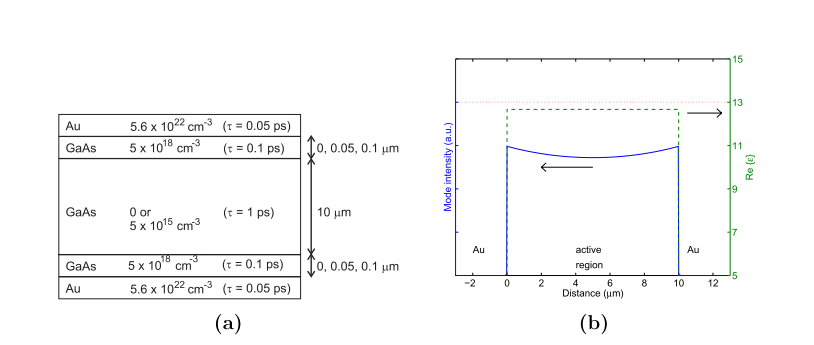

     block, center = (0,-5.15,0)
          size (1e+20,0.1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,-5.05,0)
          size (1e+20,0.1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.9,12.9,12.9)
     block, center = (0,0,0)
          size (1e+20,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.9,12.9,12.9)
     block, center = (0,5.05,0)
          size (1e+20,0.1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.9,12.9,12.9)
     block, center = (0,5.15,0)
          size (1e+20,0.1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000377893 s
Working in 2D dimensions.
Computational cell is 15 x 11 x 0 with resolution 

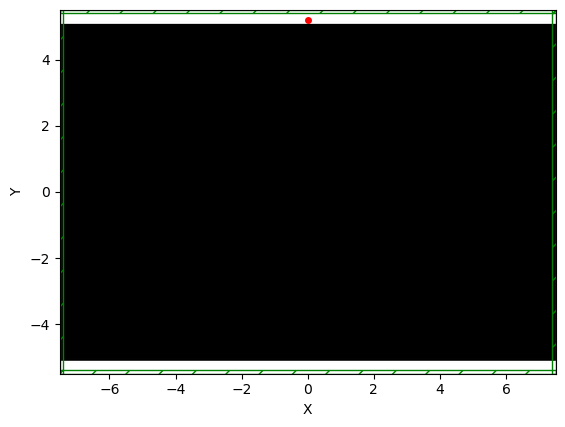

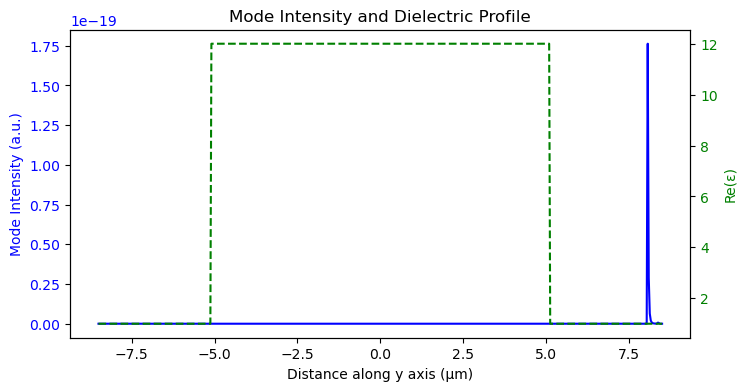

/home/jiaxin-3/anaconda3/envs/mp/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jiaxin-3/anaconda3/envs/mp/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


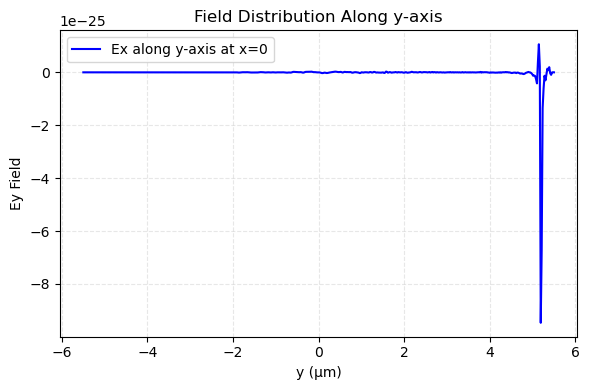

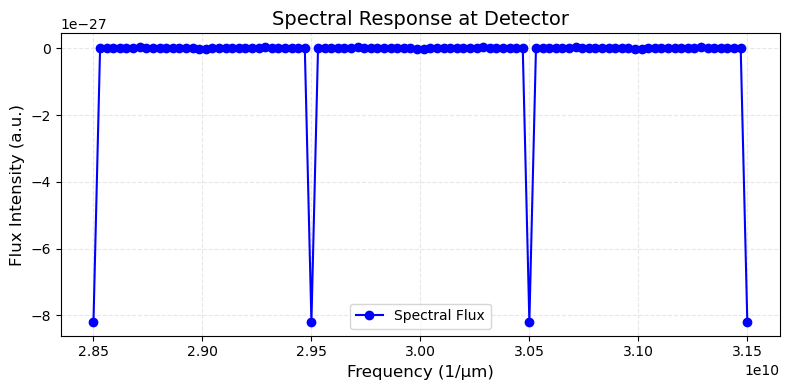

In [23]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from QCL_materials import Au,GaAs

# thickness of different layers（1 μm）
Au_thickness = 0.1
GaAs_thickness_1 = 10
GaAs_thickness_2 = 0.1

# basic setup (1 μm)
resolution = 50
sx = 15
sy = 11
sz = 1
cell = mp.Vector3(sx, sy, 0)
# Perfectly Matched Layer if THz , set PML to 1
pml_layers = [mp.PML(0.1)]

# Set up for source frequency 
frequency = 3e10 # 3THz
# Set up for detector 's observe range
observe_range = 0.1

# define the basic height of layers
y0 = -0.5 * (Au_thickness + GaAs_thickness_2 + GaAs_thickness_1 + GaAs_thickness_2 + Au_thickness)

# Construct layers
geometry = []
def add_layer(thickness, material):
    global y0
    center_y = y0 + 0.5 * thickness
    geometry.append(mp.Block(
        size=mp.Vector3(mp.inf, thickness, mp.inf),
        center=mp.Vector3(0, center_y, 0),
        material=material
    ))
    y0 += thickness

add_layer(Au_thickness, Au)
add_layer(GaAs_thickness_2, GaAs)
add_layer(GaAs_thickness_1,GaAs)
add_layer(GaAs_thickness_2, GaAs)
add_layer(Au_thickness, Au)

# Source
sources = [mp.Source(
            src=mp.ContinuousSource(frequency=frequency, fwidth=1),
            component=mp.Ey,
            center=mp.Vector3(0,10.4/2,0),
            size=mp.Vector3(0,0,0))]

# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)

# Plot the structure
sim.plot2D()

# Set up the flux monitor 
flux_monitor = sim.add_flux(frequency, frequency * observe_range, 100, 
                            mp.FluxRegion(center=mp.Vector3(7,0,0), 
                                          size=mp.Vector3(0,30,1))
                                          )

# Run the simulation
sim.run(until = 50)

# Plot Mode Intensity
ey_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ey)
center_y_index = ey_data.shape[0] // 2
field_line = np.abs(ey_data[center_y_index, :])**2  # Square of Ey intensity -> mode intensity
fig, ax1 = plt.subplots(figsize=(8, 4))
x_axis = np.linspace(-sy/2-3, sy/2+3, len(field_line))

ax1.plot(x_axis, field_line, 'b-', label='Mode Intensity')
ax1.set_xlabel('Distance along y axis (μm)')
ax1.set_ylabel('Mode Intensity (a.u.)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot Re(ε) on secondary axis
ax2 = ax1.twinx()
epsilon_profile = np.where((x_axis > -5.1) & (x_axis < 5.1), 12, 1)

ax2.plot(x_axis, epsilon_profile, 'g--', label='Re(ε)')
ax2.set_ylabel('Re(ε)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Mode Intensity and Dielectric Profile')
plt.show()

# Plot the figure of field point of Ex along the y-axis
y_vals = np.linspace(-sy/2, sy/2, 500)
ey_vals = []

for y in y_vals:
    pt = mp.Vector3(0, y)  # x=0, y=varies
    ey_vals.append(sim.get_field_point(mp.Ey, pt))

plt.figure(figsize=(6,4))
plt.plot(y_vals, ex_vals, label='Ex along y-axis at x=0', color='blue')
plt.xlabel("y (μm)")
plt.ylabel("Ey Field")
plt.title("Field Distribution Along y-axis")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the figure of frequency and flux intensity
frequencies = mp.get_flux_freqs(flux_monitor)
flux_data = mp.get_fluxes(flux_monitor)
plt.figure(figsize=(8, 4))
plt.plot(frequencies, flux_data, marker='o', color='blue', label='Spectral Flux')
plt.xlabel('Frequency (1/μm)', fontsize=12)
plt.ylabel('Flux Intensity (a.u.)', fontsize=12)
plt.title('Spectral Response at Detector', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



### another example from the book

     block, center = (0,0,-5.35)
          size (1e+20,1e+20,10)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.9,10.9,10.9)
     block, center = (0,0,-0.3)
          size (1e+20,1e+20,0.1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.9,10.9,10.9)
     block, center = (0,0,4.75)
          size (1e+20,1e+20,10)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.96,12.96,12.96)
     block, center = (0,0,10)
          size (1e+20,1e+20,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.9,10.9,10.9)
     block, center = (0,0,10.3)
          size (1e+20,1e+20,0.1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


ValueError: Axes must be different.

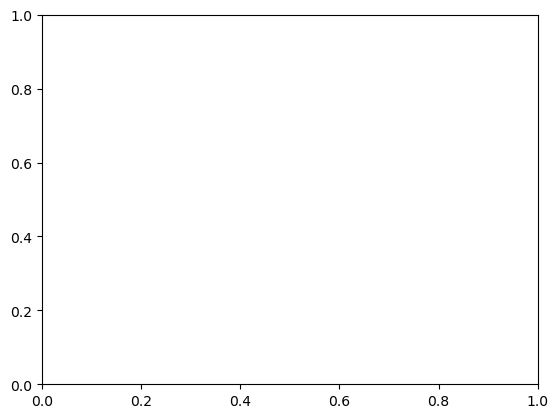

In [9]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

# === 定义材料 ===
# Au 金属
Au = mp.Medium(
    epsilon=1.0,
    E_susceptibilities=[
        mp.DrudeSusceptibility(
            frequency=1 / (2 * np.pi * 0.05e-12),
            gamma=1 / (2 * np.pi * 0.05e-12),
            sigma=1.0
        )
    ]
)

# 高掺杂 GaAs（n+）
nplus_GaAs = mp.Medium(
    epsilon=10.9,
    E_susceptibilities=[
        mp.DrudeSusceptibility(
            frequency=1 / (2 * np.pi * 0.1e-12),
            gamma=1 / (2 * np.pi * 0.1e-12),
            sigma=1.0
        )
    ]
)

# Active Region
AR = mp.Medium(epsilon=12.96)

# Substrate
substrate_GaAs = mp.Medium(
    epsilon=10.9,
    E_susceptibilities=[
        mp.DrudeSusceptibility(
            frequency=1 / (2 * np.pi * 0.1e-12),
            gamma=1 / (2 * np.pi * 0.1e-12),
            sigma=1.0
        )
    ]
)


# === 各层厚度 μm ===
Au_thickness = 0.1
nplusGaAs_thickness1 = 0.5   # 你可以改成 0.5 / 1 / 2 来对比
AR_thickness = 10.0
nplusGaAs_thickness2 = 0.1
substrate_thickness = 10.0

# === geometry 堆叠 z 方向 ===
geometry = []
z0 = -0.5 * (Au_thickness + nplusGaAs_thickness1 + AR_thickness + nplusGaAs_thickness2 + substrate_thickness)


def add_layer(thickness, material):
    global z0
    center_z = z0 + 0.5 * thickness
    geometry.append(mp.Block(
        size=mp.Vector3(mp.inf, mp.inf, thickness),
        center=mp.Vector3(0, 0, center_z),
        material=material
    ))
    z0 += thickness


add_layer(substrate_thickness, substrate_GaAs)
add_layer(nplusGaAs_thickness2, nplus_GaAs)
add_layer(AR_thickness, AR)
add_layer(nplusGaAs_thickness1, nplus_GaAs)
add_layer(Au_thickness, Au)


# === 仿真参数 ===
cell_size = mp.Vector3(0, 0, 30)  # z方向总长度，适当多预留空间
pml_layers = [mp.PML(2)]

# === 源设置：连续波，垂直入射 Ez
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=3.0),
        center=mp.Vector3(0, 0, -cell_size.z/2 + 2),  # 靠近 PML 但在仿真内
        size=mp.Vector3(0, 0, 0),
        component=mp.Ez
    )
]


# === 创建仿真
sim = mp.Simulation(
    cell_size=cell_size,
    geometry=geometry,
    sources=sources,
    boundary_layers=pml_layers,
    resolution=50,
    default_material=mp.air,
    dimensions=2
)
sim.plot2D()

# === 运行仿真，保证稳态
sim.run(until=200)

z_points = np.linspace(-15, 15, 500)
ez_intensity = [abs(sim.get_field_point(mp.Ez, mp.Vector3(0, 0, z))) ** 2 for z in z_points]
epsilon_profile = []
for z in z_points:
    if z < -5:
        epsilon_profile.append(10.9)  # substrate
    elif z < -3:
        epsilon_profile.append(10.9)  # n+ GaAs
    elif z < 7:
        epsilon_profile.append(12.96) # active
    elif z < 9:
        epsilon_profile.append(10.9)  # n+ GaAs
    else:
        epsilon_profile.append(1.0)   # Au 近似

fig, ax1 = plt.subplots()

# --- 左轴 |Ez|² ---
color = 'tab:blue'
ax1.set_xlabel('z (μm)')
ax1.set_ylabel('Mode Intensity (|Ez|²)', color=color)
ax1.plot(z_points, ez_intensity, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# --- 右轴 ε ---
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Re(ε)', color=color)
ax2.plot(z_points, epsilon_profile, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Mode Intensity and Re(ε) Along z-axis')
plt.show()
